In [7]:
from matplotlib import pyplot as plt
from matplotlib import colors as colors
import numpy as np

import sys 
sys.path.append('../')
import Utils.utils as util
from importlib import reload
reload(util)

from sklearn.linear_model import Lasso
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import normalize

np.set_printoptions(threshold=np.inf) #print full arrays
from sklearn import linear_model

In [8]:

def split_patch(patch):
    h = patch.shape[0]
    #Convert one patch into a column vector for training
    patch = patch.flatten()
    pixel_central = patch[(h*(h//2)+(h//2))*3:(h*(h//2)+(h//2))*3+3]
    patch_sans_central = np.delete(patch, range((h*(h//2)+(h//2))*3, (h*(h//2)+(h//2))*3+3))
    return np.array((patch_sans_central, pixel_central))
    
def convert_patch_into_vector(patch):
    #Convert one patch into a column vector for training
    #patch = patch.flatten()
    h = patch.shape[0]
    patch = np.reshape(patch, h*h*3)
    return np.array(patch)

def convert_vector_into_patch(vector, h):
    #Convert a one column vector into a patch of size h
    return vector.reshape((h,h,7))
    
def convert_patches_into_training_set(patches):
    #Convert a set of patches into a set of vectors
    return np.array(list(map(convert_patch_into_vector, patches))).T

def inpaint_image(noisy_image, dictionary, coord_noisy_pix, h):
    lassocv = linear_model.LassoCV()
    y, x = coord_noisy_pix[0]
    label = util.get_patch(x, y, h, noisy_image)
    label = list(convert_patch_into_vector(label))
    lassocv.fit(dictionary, label)
    alpha_ = lassocv.alpha_
    
    print("alpha = ", alpha_)
    
    i = 0
    nbiter  = len(coord_noisy_pix)
    for y, x in coord_noisy_pix:
        print( i, " / ", nbiter)
        i = i + 1
        
        print("Correction de x : ", x, " et y : ", y)
        label = util.get_patch(x, y, h, noisy_image)
        print("label = ")
        util.display_im(label)
        label = list(convert_patch_into_vector(label))

        print("--- lasso regression ---")
        
        model = Lasso(fit_intercept=True,alpha=alpha_,positive=True) #alpha=0.0001,tol=0.001
        
        dictionary_full = dictionary
        
        #todo enlever pixel central du dico
        
        
        model.fit(dictionary, label)
        
        res = model.predict(dictionary_full)
        newPixel = util.get_centered_pixel(res, h)
        
        print("nouveau pixel : ", newPixel)
        print("")
        noisy_image[x][y] = newPixel
        
        """
        coef = model.coef_.reshape((1,-1)) #poids
        sparse_coef_ = model.sparse_coef_
    
        print(sparse_coef_)
        print("coef shape : ", coef.shape)
        #print("sparse_coef_ shape : ", sparse_coef_.shape)
        print("nb patch not at zero: ", np.count_nonzero(sparse_coef_.toarray()), " / ", coef.shape[1])
        print("dictionary shape : ", dictionary.shape) 
        
        normalized_coefs = normalize(coef, norm='l1')
        #print("normalized_coefs shape = ", normalized_coefs)
        print("sum(normalized_coefs) = ", np.sum(normalized_coefs, axis=1))
        
        res = normalized_coefs*dictionary
        print("coef*dictionary shape= ",res.shape)
        
        resflat = np.sum(normalized_coefs*dictionary,axis=1)
        #print("resflat = ",resflat)
        
        print("sum(normalized_coefs*dictionary,axis=1) shape= ", resflat.shape)
        
        newPixel = util.get_centered_pixel(resflat, h)
        print("nouveau pixel : ", newPixel)
        print("")
        noisy_image[x][y] = newPixel
        """
        
        #util.display_im(noisy_image) #pour afficher toutes les images

    util.display_im(noisy_image)
    


taille de l'image :  (143, 128, 3)
128  ,  143
type =  <class 'numpy.ndarray'>
>  [255 255 255]
>  [255 255 255]
pixel  75   140 =( 17995 ) is on border
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 255]
>  [255 255 25

[245 248 255]
[249 251 255]
[212 214 227]
[196 198 211]
[229 232 247]
[231 234 251]
[214 217 234]
[238 246 249]
[244 251 255]
[235 242 255]
[174 181 199]
[188 194 208]
[181 185 194]
[187 191 192]
[241 243 240]
[136 142 140]
[115 120 123]
[191 196 202]
[196 199 206]
[224 225 229]
[246 247 249]
[251 251 253]
[251 250 255]
[250 252 251]
[248 250 249]
[252 254 253]
[250 252 251]
[252 252 252]
[255 255 255]
[252 252 252]
[253 253 253]
[243 243 245]
[238 238 238]
[244 244 244]
[254 254 252]
[253 253 251]
[250 250 250]
[253 253 253]
[255 255 255]
[238 238 246]
[239 239 247]
[236 236 246]
[241 241 253]
[235 234 248]
[226 225 241]
[215 214 230]
[222 221 239]
[76 75 73]
[122 121 127]
[231 231 239]
[164 169 165]
[85 92 74]
[71 78 60]
[101 105 106]
[138 139 159]
[176 178 203]
[175 179 204]
[169 174 196]
[216 223 242]
[222 229 248]
[178 185 204]
[172 177 197]
[199 201 222]
[213 220 238]
[255 255 255]
[194 196 217]
[191 196 218]
[157 163 185]
[171 178 194]
[184 189 193]
[103 105 100]
[174 176 191]
[

[92 65 58]
[84 61 53]
[88 69 62]
[99 82 75]
[96 81 76]
[78 63 60]
[63 42 41]
[72 52 51]
[59 43 43]
[69 55 54]
[67 49 49]
[77 53 53]
[82 52 50]
[105  69  69]
[114  84  74]
[114  81  72]
[136 102  93]
[146 107 100]
[140  99  93]
[147 102  97]
[161 113 109]
[170 121 117]
[165 114 111]
[189 140 136]
[199 149 148]
[183 135 133]
[178 128 127]
[182 131 130]
[178 124 122]
[181 125 124]
[182 121 120]
[173 112 111]
[161 101 100]
[162 104 103]
[156 100  99]
[140  86  84]
[129  78  77]
[121  70  69]
[125  80  75]
[116  73  67]
[112  75  69]
[118  85  78]
[102  72  64]
[99 66 59]
[95 60 54]
[95 60 54]
[91 53 52]
[92 57 55]
[87 52 50]
[85 50 48]
[91 53 52]
[83 47 47]
[82 54 51]
[84 63 58]
[92 71 68]
[104  78  77]
[107  77  75]
[122  89  80]
[135 108  91]
[117  98  84]
[117 106 104]
[153 147 157]
[197 200 209]
[140 144 147]
[ 99 108 105]
[127 137 136]
[157 168 174]
[169 178 193]
[173 180 199]
[204 210 232]
[199 211 209]
[207 218 222]
[196 207 213]
[202 213 217]
[171 183 179]
[86 98 94]
[174 185 187]


[176 103  86]
[162  91  73]
[155  88  71]
[162 101  82]
[172 113  95]
[179 117 104]
[186 124 113]
[196 132 122]
[203 147 148]
[198 150 150]
[118  83  81]
[83 55 51]
[70 45 40]
[73 51 40]
[73 54 40]
[84 67 51]
[104  92  76]
[98 91 73]
[103  98  79]
[111 106  87]
[108 101  83]
[105  98  80]
[95 90 71]
[98 97 77]
[100 103  86]
[102 104  90]
[93 97 83]
[88 91 80]
[86 92 82]
[82 90 79]
[79 89 78]
[73 83 72]
[71 83 79]
[71 82 74]
[80 92 80]
[ 89 101  87]
[79 90 74]
[71 82 66]
[70 78 65]
[68 76 65]
[65 73 58]
[63 71 56]
[67 78 62]
[74 85 69]
[76 87 71]
[75 88 71]
[75 88 71]
[72 85 68]
[178 183 187]
[91 95 72]
[94 92 67]
[121 112 117]
[189 185 202]
[146 150 153]
[162 167 170]
[219 221 242]
[192 197 216]
[152 161 170]
[138 147 142]
[117 120 109]
[96 93 86]
[121 117 118]
[191 193 205]
[217 226 243]
[232 239 247]
[118 124 112]
[92 91 70]
[99 90 75]
[95 78 70]
[120  98  84]
[102  79  65]
[87 59 55]
[89 69 62]
[64 45 39]
[48 33 28]
[39 28 24]
[23 15 12]
[22 14 11]
[33 24 19]
[28 19 14]
[37 27 25]
[

[252 176 186]
[247 171 183]
[251 178 189]
[244 184 192]
[234 194 202]
[151 130 135]
[157 162 165]
[183 189 187]
[187 193 193]
[174 179 182]
[132 140 125]
[68 79 45]
[59 70 38]
[ 98 106  93]
[ 94 101 107]
[80 85 89]
[64 68 67]
[69 70 65]
[86 86 76]
[107 105  92]
[85 83 68]
[74 73 55]
[79 76 71]
[83 80 75]
[88 83 79]
[89 84 80]
[87 82 78]
[86 81 77]
[88 80 77]
[89 81 78]
[89 84 80]
[85 80 74]
[88 83 77]
[93 88 82]
[91 86 80]
[89 84 78]
[91 86 80]
[94 90 81]
[93 87 65]
[102  96  74]
[108 100  77]
[98 90 67]
[94 88 66]
[110 105  86]
[99 95 83]
[99 97 85]
[102 106  91]
[105 109  95]
[100 106  92]
[ 97 103  89]
[88 94 80]
[83 89 75]
[90 96 82]
[87 93 79]
[100 100  92]
[98 96 81]
[89 87 62]
[99 95 68]
[100  94  72]
[97 88 73]
[106  96  86]
[134 121 112]
[114  83  80]
[103  74  66]
[83 55 43]
[72 48 36]
[59 39 32]
[45 27 23]
[35 21 18]
[45 34 28]
[39 28 24]
[29 22 16]
[29 26 19]
[24 21 14]
[23 16 10]
[31 20 16]
[46 32 29]
[41 30 26]
[43 31 31]
[68 48 47]
[105  71  70]
[134  86  84]
[165 107 10

[19 18 16]
[15 15 15]
[11 11 11]
[18 20 17]
[26 26 24]
[46 35 33]
[113  83  81]
[157 116 114]
[154 106 102]
[138  91  85]
[143  96  88]
[150 103  97]
[150 100  93]
[158 107 103]
[154 103 100]
[153 102 101]
[158 104 102]
[162 107 104]
[171 114 107]
[172 113 105]
[176 115 110]
[170 111 103]
[178 120 109]
[185 127 115]
[191 133 121]
[202 143 135]
[207 150 143]
[213 155 153]
[204 148 147]
[199 137 138]
[213 144 147]
[226 149 157]
[216 133 143]
[222 136 149]
[219 131 145]
[218 130 146]
[225 141 156]
[231 151 164]
[233 153 164]
[234 151 161]
[238 148 160]
[243 151 166]
[243 150 168]
[236 148 164]
[241 150 165]
[243 144 162]
[234 131 150]
[219 126 145]
[218 144 161]
[226 168 180]
[233 181 185]
[232 178 178]
[227 179 177]
[229 176 170]
[212 158 148]
[192 145 137]
[175 144 141]
[160 145 148]
[144 139 146]
[144 142 153]
[155 146 151]
[128 119 122]
[127 119 117]
[127 118 111]
[118 110  97]
[110 103  85]
[114 108  86]
[99 93 69]
[100  95  73]
[101  96  76]
[107 101  85]
[119 113 101]
[109 105  93]

[201 153 149]
[207 157 156]
[211 165 165]
[218 174 175]
[212 172 172]
[214 182 185]
[45 25 34]
[41 37 54]
[53 59 85]
[ 62  73 103]
[ 95 103 126]
[ 83  89 101]
[92 94 93]
[91 91 81]
[87 85 72]
[87 83 71]
[95 91 80]
[100  92  81]
[105  99  87]
[106  99  89]
[107  98  93]
[115 104 100]
[121 113 102]
[110 112  88]
[ 93 101  64]
[ 97 101  66]
[107 107  79]
[129 126 107]
[166 159 149]
[186 177 172]
[164 155 150]
[139 130 123]
[139 130 121]
[143 133 124]
[135 125 116]
[125 115 106]
[118 107 103]
[105  93  93]
[255 255 255]
[111 101  92]
[118 109  94]
[110  96  93]
[120 109 105]
[138 131 123]
[128 124 115]
[121 118 109]
[116 111 105]
[133 125 122]
[158 148 146]
[131 108  92]
[159 141 141]
[148 138 147]
[131 129 132]
[95 96 78]
[102 103  69]
[106 108  71]
[103 104  73]
[108 113  81]
[101 104  83]
[255 255 255]
[114 113 121]
[142 138 152]
[203 200 207]
[214 213 211]
[132 132 122]
[103 105  83]
[101  98  79]
[123 115 102]
[124 116 113]
[162 157 163]
[219 219 231]
[232 234 246]
[243 243 253]
[224 

[28 31 40]
[21 26 32]
[29 34 40]
[28 31 36]
[22 25 30]
[25 28 33]
[27 30 35]
[26 26 34]
[25 25 35]
[29 29 39]
[26 26 36]
[24 24 34]
[27 27 37]
[28 28 40]
[26 26 38]
[26 26 38]
[26 26 38]
[19 22 37]
[30 33 48]
[37 39 52]
[22 24 37]
[26 30 42]
[28 31 46]
[25 31 47]
[29 36 54]
[37 37 61]
[30 35 64]
[39 49 85]
[ 57  70 114]
[ 82  94 142]
[ 74  82 128]
[54 57 98]
[43 43 81]
[42 62 99]
[ 71  92 135]
[ 82 102 152]
[ 64  80 131]
[26 39 84]
[ 76  88 130]
[ 83  98 139]
[ 99 118 160]
[ 54  66 104]
[ 59  70 100]
[116 124 145]
[173 181 194]
[110 116 132]
[57 62 84]
[38 45 73]
[ 65  76 106]
[ 98 115 131]
[115 131 154]
[ 90 106 140]
[145 164 207]
[129 153 199]
[110 134 178]
[118 140 179]
[160 179 212]
[201 203 228]
[145 139 153]
[127 109 107]
[130 107  89]
[132 106  81]
[146 119  98]
[147 117 107]
[136 102 101]
[151 132 128]
[137 117 116]
[125 106 108]
[155 140 147]
[135 127 142]
[169 169 195]
[178 184 218]
[135 147 187]
[ 92 116 160]
[149 174 215]
[119 142 183]
[116 138 177]
[117 137 172]
[120 136 1

nbnoisy: 0 ,   nbclear: 1974


IndexError: list index out of range

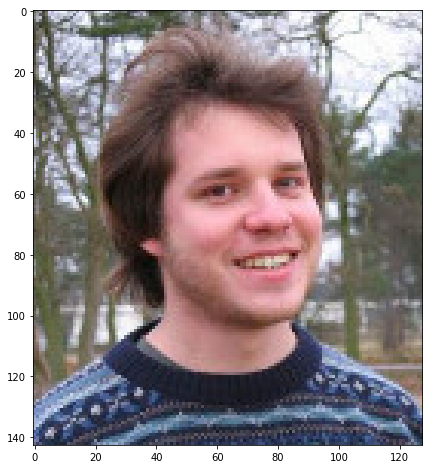

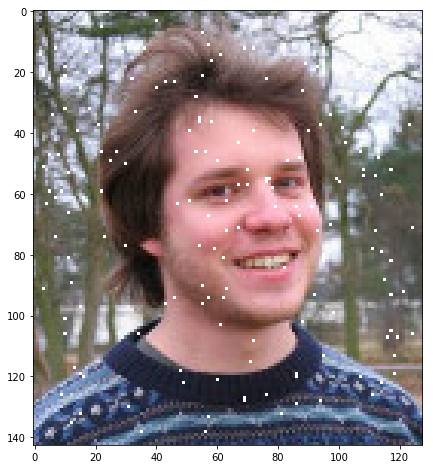

In [10]:
%matplotlib inline
img_matrice = util.read_im("Data/imgdataset/12.jpg")

"""
eau.jpg,
h = 9
alpha=0.1
"""
print("taille de l'image : ", img_matrice.shape)

util.display_im(img_matrice)

#Taille des patchs
h=3 #nombre impair

#noisy_image = delete_rect(img_matrice, 400, 400, 500, 100)
#display_im(noisy_image)

#display_im(img_matrice)

#util.display_im(util.get_patch(50, 50, 4, img_matrice))

width = img_matrice.shape[1]
height = img_matrice.shape[0]

print(width," , ", height)

print("type = ",type(img_matrice))

noisy_image, noise_pixels = util.noise(img_matrice, 0.01, width, height, h)
util.display_im(noisy_image)

for i in range(0, noisy_image.shape[0]):
     for j in range(0, noisy_image.shape[1]):
            print(noisy_image[i][j])
            if(np.array_equal(noisy_image[i][j], np.array([-1, -1, -1]))):
                print("NOISYYY")
                i = noisy_image.shape[0]
                j = noisy_image.shape[1]

_,clear_patches = util.get_patches(img_matrice, h, width, height)
noisy_patches,_ = util.get_all_patches(noisy_image, h,width, height)

#noisy_patches = patches[0]
#clear_patches = patches[1]

#print("New patch : ", convert_patch_into_vector(clear_patches[5]))

nbnoisy = np.shape(noisy_patches)[0]
nbclear = np.shape(clear_patches)[0]

print("nbnoisy:", nbnoisy, ",   nbclear:", nbclear)

util.display_im(noisy_patches[0])
#patch_sans_central, pixel_central = split_patch(noisy_patches[0])
#print(patch_sans_central)
#print(pixel_central)


In [73]:
training = convert_patches_into_training_set(clear_patches)
print(training.shape)

#for patch in clear_patches:
#    util.display_im(patch)

(27, 1974)


In [ ]:
inpaint_image(noisy_image, training, noise_pixels, h)

alpha =  2482.7900880006964
0  /  164
Correction de x :  101  et y :  61
label = 
--- lasso regression ---
nouveau pixel :  [161, 161, 161]

1  /  164
Correction de x :  128  et y :  121
label = 
--- lasso regression ---
nouveau pixel :  [156, 156, 156]

2  /  164
Correction de x :  3  et y :  120
label = 
--- lasso regression ---
nouveau pixel :  [221, 221, 221]

3  /  164
Correction de x :  105  et y :  83
label = 
--- lasso regression ---
nouveau pixel :  [192, 192, 192]

4  /  164
Correction de x :  103  et y :  98
label = 
--- lasso regression ---
nouveau pixel :  [164, 164, 164]

5  /  164
Correction de x :  53  et y :  23
label = 
--- lasso regression ---
nouveau pixel :  [160, 160, 160]

6  /  164
Correction de x :  112  et y :  32
label = 
--- lasso regression ---
nouveau pixel :  [155, 155, 155]

7  /  164
Correction de x :  77  et y :  25
label = 
--- lasso regression ---
nouveau pixel :  [158, 158, 158]

8  /  164
Correction de x :  41  et y :  56
label = 
--- lasso regress

KeyboardInterrupt: 

In [ ]:
util.display_im(clear_patches[292])